In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import accuracy_score
from sklearn.metrics.pairwise import cosine_similarity
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

# Exploration de la base de données initiale

In [6]:
df_all = pd.read_csv('all_movies_ratings.csv', sep = ',', error_bad_lines=False)

/var/folders/10/4sw8kq2x1s91v_mqcdpf9sf80000gn/T/ipykernel_1003/446994438.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv('all_movies_ratings.csv', sep = ',', error_bad_lines=False)


In [ ]:
df_movie = pd.read_csv('movies_final.csv', sep = ',')

In [34]:
# Convertir data
df_movie['year'] = df_movie['year'].astype(str)

df_movie['year'] = df_movie['year'].apply(lambda x: datetime.strptime(x, '%Y.0').year if x != 'nan' else None)

In [12]:
# Séparation genre
genres_dummies = df_movie['genres'].str.get_dummies(sep='|')

# Concat
df_movie_dummy = pd.concat([df_movie, genres_dummies], axis=1)

In [17]:
# Select
df_selection = df_movie_dummy[['movieId'] + list(df_movie_dummy.columns[df_movie_dummy.columns.get_loc('genres'):])]

In [19]:
df_selection = df_selection.drop('genres', axis=1)

In [24]:
# TEST arbre 
X = df_selection[['movieId']]
y = df_selection.drop('movieId', axis=1)


mlb = MultiLabelBinarizer()
y_multilabel = mlb.fit_transform(y.values)


X_train, X_test, y_train, y_test = train_test_split(X, y_multilabel, test_size=0.2, random_state=42)


model = RandomForestClassifier(random_state=42)

model.fit(X_train, y_train)


predictions = model.predict(X_test)

accuracy = accuracy_score(y_test, predictions)

# Affichage
print(f"Accuracy: {accuracy}")

Accuracy: 1.0


In [25]:
from sklearn.metrics import precision_score, recall_score, f1_score, jaccard_score

#  précision
precision = precision_score(y_test, predictions, average='micro')

# rappel
recall = recall_score(y_test, predictions, average='micro')

# F1-score
f1 = f1_score(y_test, predictions, average='micro')

# score Jaccard
jaccard = jaccard_score(y_test, predictions, average='micro')

# Affichage
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print(f"Jaccard Score: {jaccard}")

Precision: 1.0
Recall: 1.0
F1-Score: 1.0
Jaccard Score: 1.0


## Nouvelle base 5Go

In [36]:
dataset = pd.read_csv('movie_db.csv', sep = ',', error_bad_lines=False)

/var/folders/10/4sw8kq2x1s91v_mqcdpf9sf80000gn/T/ipykernel_9728/147727618.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  dataset = pd.read_csv('movie_db.csv', sep = ',', error_bad_lines=False)


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000095 entries, 0 to 25000094
Data columns (total 9 columns):
 #   Column      Dtype  
---  ------      -----  
 0   Unnamed: 0  int64  
 1   movieId     int64  
 2   title       object 
 3   genres      object 
 4   year        float64
 5   userId      int64  
 6   rating      float64
 7   timestamp   int64  
 8   Synopsis    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 1.7+ GB


In [5]:
dataset.isna().sum()

Unnamed: 0        0
movieId           0
title         11771
genres            0
year          11771
userId            0
rating            0
timestamp         0
Synopsis          0
dtype: int64

In [6]:
rows_with_missing_title = dataset[dataset['title'].isnull()]

In [7]:
rows_with_missing_title

,Unnamed: 0,movieId,title,genres,year,userId,rating,timestamp,Synopsis
18851861,18851861,8359,NaN,['Drama'],NaN,43188,4.5,1523678508,Description non disponible
18851862,18851862,8359,NaN,['Drama'],NaN,61363,4.0,1417917738,Description non disponible
18851863,18851863,8359,NaN,['Drama'],NaN,143049,3.5,1319514235,Description non disponible
18851864,18851864,26815,NaN,"['Comedy', 'Drama']",NaN,119765,2.5,1387236800,Description non disponible
18851865,18851865,79607,NaN,"['Action', 'Drama', 'Sci-Fi', 'Thriller']",NaN,20744,3.5,1554747144,Description non disponible
...,...,...,...,...,...,...,...,...,...
18863627,18863627,207714,NaN,['Not specified'],NaN,105679,3.0,1571720524,Description non disponible
18863628,18863628,207884,NaN,['Not specified'],NaN,133867,5.0,1571970342,Description non disponible
18863629,18863629,208597,NaN,['Documentary'],NaN,131116,5.0,1573239533,Description non disponible
18863630,18863630,208763,NaN,['Not specified'],NaN,115835,2.5,1573517455,Description non disponible


In [37]:
dataset = dataset.dropna(subset=['title'])

In [8]:
dataset.isna().sum() # NA 

Unnamed: 0    0
movieId       0
title         0
genres        0
year          0
userId        0
rating        0
timestamp     0
Synopsis      0
dtype: int64

In [35]:
# Sélectionnez uniquement les colonnes 'movie_id' et 'genre'
#df_selected = dataset[['movieId', 'genres','rating']] 

# Supprimez les lignes en double basées sur 'movie_id'
#df_unique_movies = df_selected.drop_duplicates(subset='movieId')


"\n# Sélectionnez uniquement les colonnes 'movie_id' et 'genre'\ndf_selected = dataset[['movieId', 'genres','rating']] \n\n# Supprimez les lignes en double basées sur 'movie_id'\ndf_unique_movies = df_selected.drop_duplicates(subset='movieId')\n"

In [23]:
#df_unique_movies

,movieId,genres,rating
0,1,"['Adventure', 'Animation', 'Children', 'Comedy...",3.5
57309,2,"['Adventure', 'Children', 'Fantasy']",5.0
81537,3,"['Comedy', 'Romance']",4.0
93341,4,"['Comedy', 'Drama', 'Romance']",3.0
95864,5,['Comedy'],4.0
...,...,...,...
25000090,209157,['Drama'],1.5
25000091,209159,['Documentary'],3.0
25000092,209163,"['Comedy', 'Drama']",4.5
25000093,209169,['Not specified'],3.0


In [38]:
# Calculer la moyenne des notes par MovieID
average_ratings = dataset.groupby('movieId')['rating'].mean()

# Sélectionner les MovieID dont la moyenne est inférieure à 2
low_average_movie_ids = average_ratings[average_ratings < 2].index

# supprimer movie avec moyenne < 2
dataset = dataset[~dataset['movieId'].isin(low_average_movie_ids)]

In [14]:
#dataset.drop('genres', axis=1, inplace=True)

#result_df = pd.merge(df_movie_dummy, dataset, on='movieId', how='inner','rating_y')

In [16]:
#result_df.rename(columns={'rating_x': 'rating'}, inplace=True)

In [39]:
#print(dataset.columns)

Index(['Unnamed: 0', 'movieId', 'title', 'genres', 'year', 'userId', 'rating',
       'timestamp', 'Synopsis'],
      dtype='object')


In [ ]:
# Suppression colonnes 
dataset.drop(['Unnamed: 0'], axis=1, inplace=True)

In [ ]:
dataset

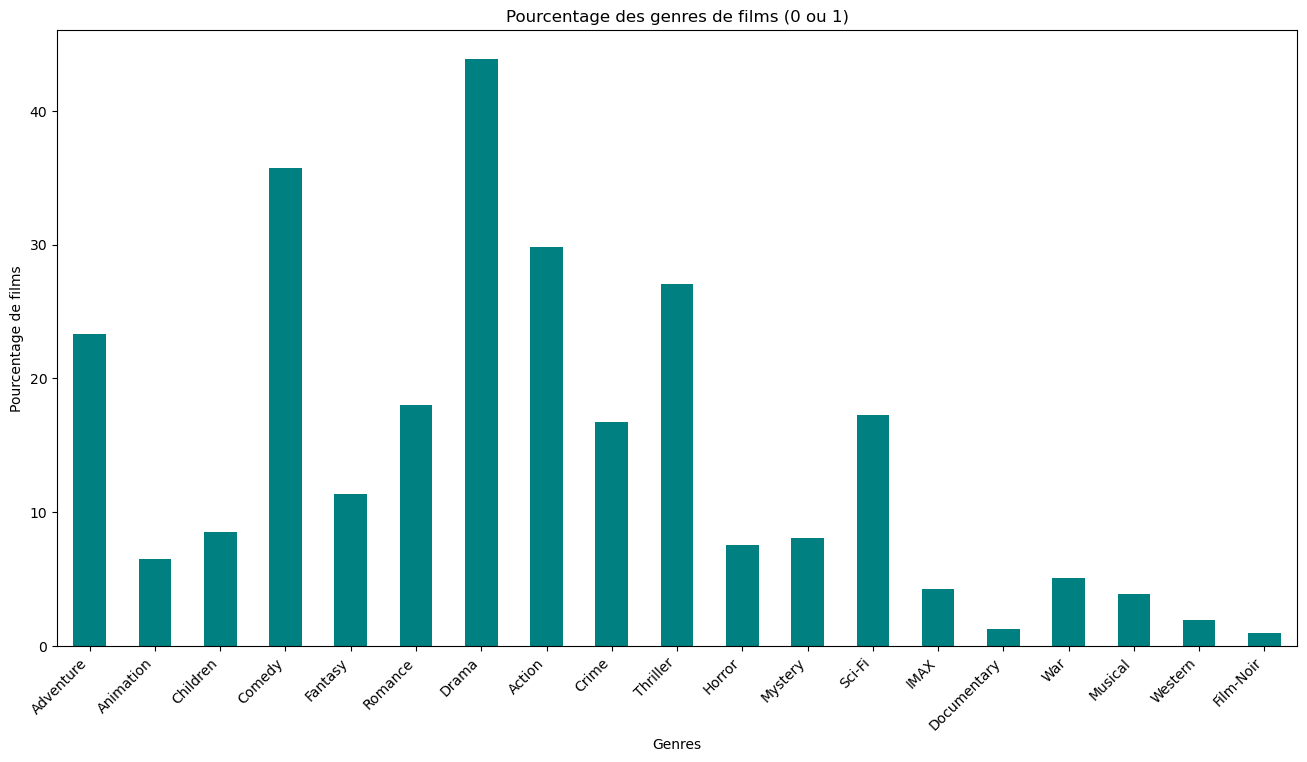

In [41]:

#selected_columns = ['Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy',
                    # 'Romance', 'Drama', 'Action', 'Crime', 'Thriller', 'Horror',
                    # 'Mystery', 'Sci-Fi', 'IMAX', 'Documentary', 'War',
                    # 'Musical', 'Western', 'Film-Noir']


#genre_percentages = dataset[selected_columns].mean()

# graphique
#plt.figure(figsize=(16, 8))
#genre_percentages.plot(kind='bar', color='teal')
#plt.title('Pourcentage des genres de films (0 ou 1)')
#plt.xlabel('Genres')
#plt.ylabel('Pourcentage de films')
#plt.xticks(rotation=45, ha='right')
#plt.show()


# Rating 

In [42]:
# statistiques descriptives
print(dataset['rating'].describe())

count    2.498832e+07
mean     3.533793e+00
std      1.060736e+00
min      5.000000e-01
25%      3.000000e+00
50%      3.500000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64


<function matplotlib.pyplot.show(close=None, block=None)>

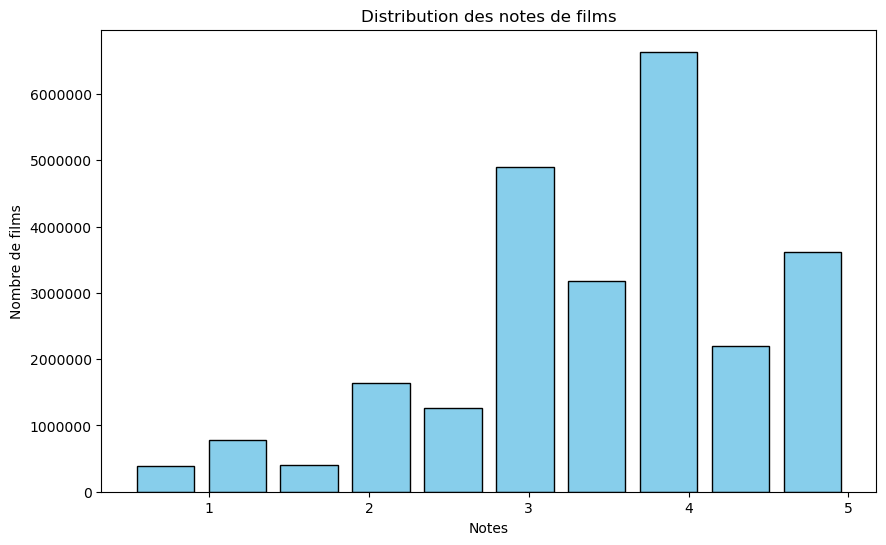

In [52]:
#ratings = dataset['rating']

# histogramme 
#plt.figure(figsize=(10, 6))
#plt.hist(ratings, color='skyblue', edgecolor='black', rwidth=0.8)
#plt.title('Distribution des notes de films')
#plt.xlabel('Notes')
#plt.ylabel('Nombre de films')

# Désactiver notation scientifique 
#plt.gca().get_yaxis().get_major_formatter().set_scientific(False)

#plt.show


In [55]:
## Fréquence rating sous forme de tableau 

ratings = dataset['rating']


rating_frequencies = ratings.value_counts().sort_index()

# tableau 
frequency_table = pd.DataFrame({
    'Note': rating_frequencies.index,
    'Fréquence': rating_frequencies.values
})


print(frequency_table)


   Note  Fréquence
0   0.5     392787
1   1.0     776552
2   1.5     399265
3   2.0    1640412
4   2.5    1262169
5   3.0    4895397
6   3.5    3175360
7   4.0    6636993
8   4.5    2198776
9   5.0    3610613
